In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing  import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
print(os.getcwd())
print(os.listdir())

C:\Users\ABHISHEK
['-1.14-windows.xml', '.anaconda', '.android', '.arduinoIDE', '.bash_history', '.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.EDA.ipynb.layout', '.emulator_console_auth_token', '.gradle', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.m2', '.matplotlib', '.ms-ad', '.p2', '.SmartTomcat', '.VirtualBox', '.virtual_documents', '.vscode', '.vscode-R', 'abhi', 'Age vs Spending Income-checkpoint.ipynb', 'anaconda3', 'anaconda_projects', 'AndroidStudioProjects', 'Annual Income vs Spending Score-checkpoint.ipynb', 'AppData', 'Application Data', 'Clustering Project.ipynb', 'Contacts', 'contourpy-1.3.1-cp311-cp311-win_amd64.whl', 'Cookies', 'CrossDevice', 'Customer Segmentation Dataset.xlsx', 'cycler-0.12.1-py3-none-any.whl', 'desktop', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'EDA-checkpoint.ipynb', 'EDA.ipynb', 'Favorites', 'fonttools-4.56.0-cp311-cp311-win_amd64.whl', 'IdeaProjects', 'kiwisolver-1.4.8-cp311-cp311-win_amd64.whl', 'Link

In [2]:
df = pd.read_excel('Customer Segmentation Dataset.xlsx')

In [3]:
#numerical columns for PCA
numeric_cols = [
    'Age',
    'Annual Income(USD)',
    'Spending Score (1-100)',
    'Purchase Frequency(per month)',
    'AvgPurchaseValue (USD)',
    'LoyaltyScore (1-10)',
    'Tenure (Years)'
]

In [5]:
# missing values with column mean (if any)
df_numeric = df[numeric_cols].fillna(df[numeric_cols].mean())

In [6]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [7]:
# Fit PCA to retain over 90% variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

In [8]:
# PCA explained variance for each principal component
explained_var = pca.explained_variance_ratio_
print('Explained variance by component:', explained_var)
print('Total variance explained:', explained_var.sum())

Explained variance by component: [0.1889468  0.16867598 0.14898912 0.14706316 0.13639431 0.11791952]
Total variance explained: 0.9079888899557552


In [9]:
# Principal axes in feature space (component loadings)
print('PCA components:')
for i, component in enumerate(pca.components_):
    print(f'PC{i+1}:', dict(zip(numeric_cols, np.round(component, 4))))

PCA components:
PC1: {'Age': np.float64(0.1407), 'Annual Income(USD)': np.float64(-0.2261), 'Spending Score (1-100)': np.float64(0.2495), 'Purchase Frequency(per month)': np.float64(0.5072), 'AvgPurchaseValue (USD)': np.float64(0.3913), 'LoyaltyScore (1-10)': np.float64(-0.3216), 'Tenure (Years)': np.float64(0.5942)}
PC2: {'Age': np.float64(-0.0475), 'Annual Income(USD)': np.float64(0.5917), 'Spending Score (1-100)': np.float64(-0.5278), 'Purchase Frequency(per month)': np.float64(0.5475), 'AvgPurchaseValue (USD)': np.float64(0.1541), 'LoyaltyScore (1-10)': np.float64(0.2134), 'Tenure (Years)': np.float64(0.0048)}
PC3: {'Age': np.float64(-0.3805), 'Annual Income(USD)': np.float64(0.1151), 'Spending Score (1-100)': np.float64(0.4372), 'Purchase Frequency(per month)': np.float64(-0.0562), 'AvgPurchaseValue (USD)': np.float64(0.6803), 'LoyaltyScore (1-10)': np.float64(0.3365), 'Tenure (Years)': np.float64(-0.2675)}
PC4: {'Age': np.float64(0.8164), 'Annual Income(USD)': np.float64(0.266), 

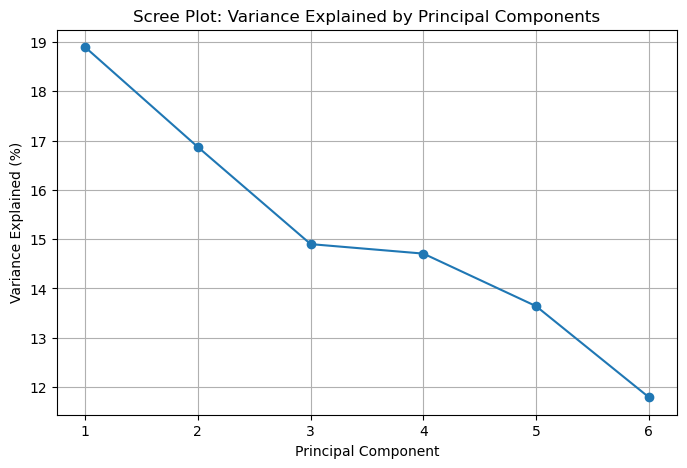

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_var) + 1), explained_var * 100, marker='o')
plt.title('Scree Plot: Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.grid(True)
plt.show()

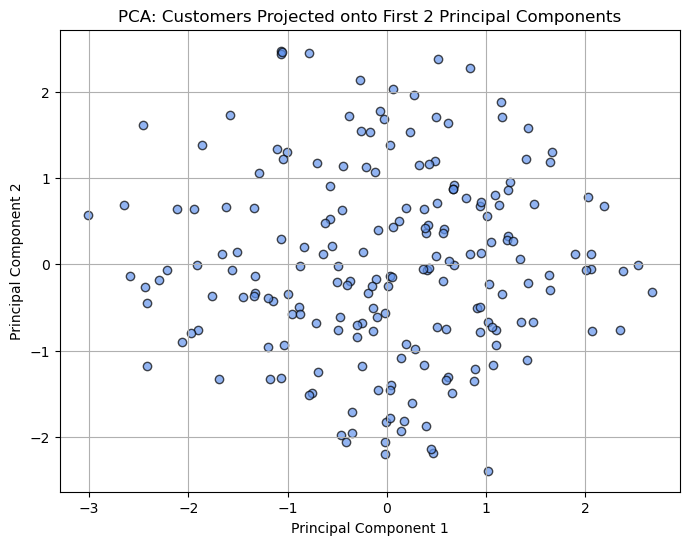

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='cornflowerblue', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Customers Projected onto First 2 Principal Components')
plt.grid(True)
plt.show()

In [12]:
for idx in range(X_pca.shape[1]):
    df[f'PC{idx+1}'] = X_pca[:, idx]

# Save the DataFrame with PCA components to a new file
df.to_csv('customer_data_with_pca.csv', index=False)

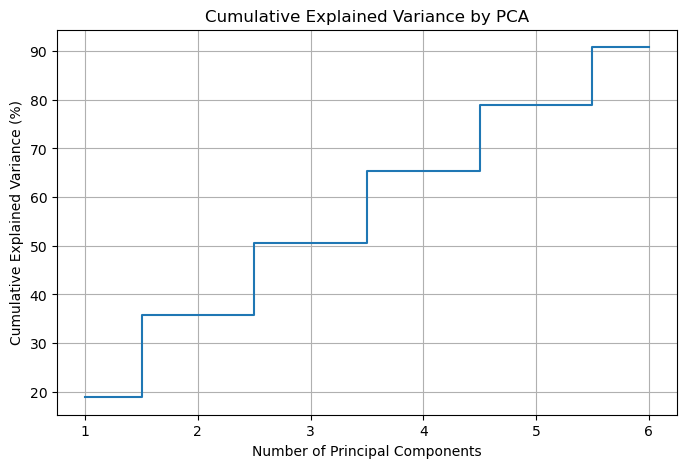

In [13]:
plt.figure(figsize=(8,5))
plt.step(range(1, len(explained_var)+1), np.cumsum(explained_var)*100, where='mid')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()